Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## https://docs.python.org/2/library/csv.html
## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('datasets/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
type(enrollments)

list

In [3]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [4]:
import unicodecsv

def read_data_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        file_data = list(reader)
    return file_data

In [6]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

engagement_filename = 'datasets/daily_engagement.csv'
submission_filename = 'datasets/project_submissions.csv'

daily_engagement = read_data_csv(engagement_filename)
project_submissions = read_data_csv(submission_filename)

In [7]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [8]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing Data Types

对数据类型进行处理 还是处于准备数据阶段

In [9]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [10]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [11]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

1-自己得提问

下面的是 data wrangling

In [15]:
#####################################
#                 2                 #
#####################################

## Investigating the data
## Now you've started the data wrangling process by loading the data and making sure it's in a good format. 
##The next step is to investigate a bit and see if there are any inconsistencies or problems in the data that 
## you'll need to clean up.
## For each of the three files you've loaded, find the total number of rows in the csv and the number of unique students. 
## To find the number of unique students in each table, 
## you might want to try creating **a set of the account keys**.


## Find the total number of rows and the number of unique students (account keys)
## in each table. 
## 查看多少学生在 enrollment, engagement, project_submission
## 写一个 再函数化

unique_enrollment_students = set()

for enrollment_record in enrollments:
    account_key = enrollment_record['account_key']
    if account_key not in unique_enrollment_students: 
        unique_enrollment_students.add(account_key)

len(unique_enrollment_students)

1302

In [16]:
# the teacher's answer

unique_enrolled_students = set()

for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
    
len(unique_enrolled_students)

1302

In [ ]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])

## Problems in the Data

In [18]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
## 现将 engagement table 中的 acct 这一栏改为 “account_key” 就是修改字典中的 key
## 修改字典中的 key_word

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

daily_engagement[0]['account_key']

u'0'

In [25]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students
# just keys in dict set
unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_submission_students = get_unique_students(project_submissions)

print "Total_Enrollment_Num:{0}".format(len(enrollments))
print "Unique enrolled students numbers:{0}".format(len(unique_enrolled_students))
print '-----------------------------------------'
print 'Total_Engagement_Num:{0}'.format(len(daily_engagement))
print 'Unique engagement students numbers:{0}'.format(len(unique_engagement_students))
print '-----------------------------------------'
print 'Total_submission_Num:{0}'.format(len(project_submissions))
print 'Unique submission students numbers:{0}'.format(len(unique_submission_students))

Total_Enrollment_Num:1640
Unique enrolled students numbers:1302
-----------------------------------------
Total_Engagement_Num:136240
Unique engagement students numbers:1237
-----------------------------------------
Total_submission_Num:3642
Unique submission students numbers:743


## Missing Engagement Records

In [28]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

## 在 enrollment中的 then 不在 daily engagement, find it then print it

# for enrollment_record in enrollments:
#    for engagement_record in daily_engagement:
#        if enrollment['account_key'] not in engagement_record:
#            print enrollment_record
#            break

## the answer

for enrollment_record in enrollments:
    student = enrollment_record['account_key']
    if student not in unique_engagement_students:
        print enrollment_record
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [30]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## enrollments missing from the engagement table
## 但是仍留了下来,不在 engagemnt 中 但是 joined date 和 cancel date 不是同一天的就是问题data

num_problem_students = 0 

for enrollment_record in enrollments:
    student = enrollment_record['account_key']
    if student not in unique_engagement_students and enrollment_record['join_date'] != enrollment_record['cancel_date']:
        num_problem_students += 1
        print enrollment_record

num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## Tracking Down the Remaining Problems

In [31]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [32]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [33]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [37]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

## 在 non_udacity_enrollments 中的
## 条件 cancel date - joined date > 7 

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel']  > 7:
        student = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if student not in paid_students or enrollment_date > paid_students[student]:
            paid_students[student] = enrollment_date

print len(paid_students)

995


## Getting Data from First Week

In [38]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [42]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

## a list
## engagement so in daily_engagement table
## only data of paid students during first week

paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    student = engagement['account_key']
    if student in paid_students:
        join_date = paid_students[student]
        engagement_date = engagement['utc_date']
        if within_one_week(join_date, engagement_date):
            paid_engagement_in_first_week.append(engagement)

print len(paid_engagement_in_first_week)

21508


In [43]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [44]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
print len(paid_engagement_in_first_week)

21508


## Exploring Student Engagement

In [47]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [49]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [50]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 647.590173826
Standard deviation: 1129.27121042
Minimum: 0.0
Maximum: 10568.1008673


## Debugging Data Analysis Code

In [51]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# 找出 最大的那个学生 account_key
# then print it

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

10568.100867332541

In [52]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 50.9938951667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 7, 0, 0)}
{u'lessons_completed': 5, u'num_courses_visited': 2, u'total_minutes_visited': 688.3034385, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 8, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 427.691757667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 3, u'total_minutes_visited': 165.6270925, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited

In [57]:
# debug
# 不是一周的 可能是 join 了 又cancel 

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
print len(paid_engagement_in_first_week)

6919


In [58]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [59]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [60]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Lessons Completed in First Week

In [61]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Std:', np.std(data)
    print 'min:', np.min(data)
    print 'max:', np.max(data)

In [63]:
lessons_completed_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    lessons_completed_by_account[account_key] = total_lessons

total_lessons_num = lessons_completed_by_account.values()

describe_data(total_lessons_num)

Mean: 1.63618090452
Std: 3.00256129983
min: 0
max: 36


In [64]:
# the teacher's answer

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

## 写成函数形式
engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

In [65]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')

In [66]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [67]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


#### 多次使用的计算流程 就 写成函数形式

## Number of Visits in First Week

In [81]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

## 为 num_courses_visited = 0 的那些去除
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            if data_point[field_name] > 0:
                total += data_point[field_name]
            summed_data[key] = total
    return summed_data

courses_visited_by_account = sum_grouped_items(engagement_by_account, 'num_courses_visited')
describe_data(courses_visited_by_account.values())

Mean: 3.97889447236
Standard deviation: 3.5912451871
Minimum: 0
Maximum: 25


In [77]:
# i am wrong 
## see the teacher's answer
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

courses_visited_by_account = sum_grouped_items(engagement_by_account,
                                             'has_visited')
describe_data(courses_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [84]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

# 1 submission 中过的人
# 2 submission 中没过的人

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if (project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

647

In [85]:
passing_engagement = []
non_passing_engagement =[]

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [89]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')

print "non - passing students--->"
describe_data(non_passing_minutes.values())

print "passing students--->"
describe_data(passing_minutes.values())

 non - passing students--->
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students--->
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


In [90]:
# so the lessons num is also the same

non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')

print "non - passing students--->"
describe_data(non_passing_lessons.values())

print "passing students--->"
describe_data(passing_lessons.values())

non - passing students--->
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students--->
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


non - passing students--->
Mean: 2.58908045977
Standard deviation: 2.90670969025
Minimum: 0
Maximum: 18
passing students--->
Mean: 4.72642967543
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25


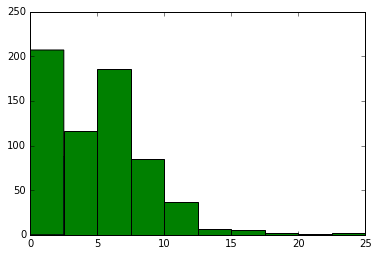

In [99]:
# days visit

non_passing_courses = sum_grouped_items(non_passing_engagement_by_account, 'num_courses_visited')
passing_courses = sum_grouped_items(passing_engagement_by_account, 'num_courses_visited')

print "non - passing students--->"
describe_data(non_passing_courses.values())

print "passing students--->"
describe_data(passing_courses.values())

## Making Histograms

In [91]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


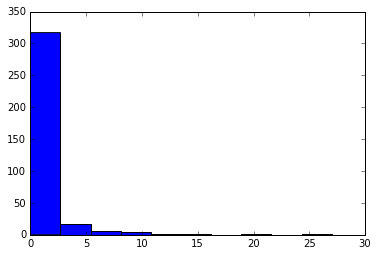

In [93]:
# lessons non passing students
describe_data(non_passing_lessons.values())

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


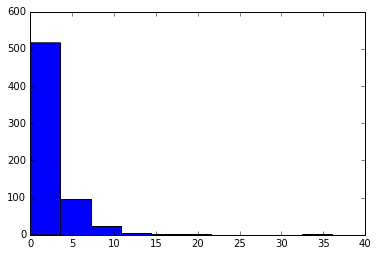

In [94]:
# lessons passing students
describe_data(passing_lessons.values())

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


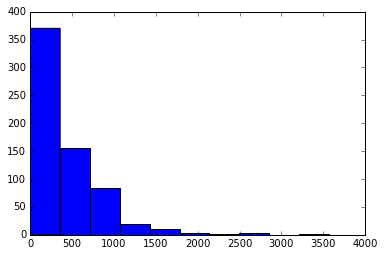

In [96]:
# minutes passing students
describe_data(passing_minutes.values())

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


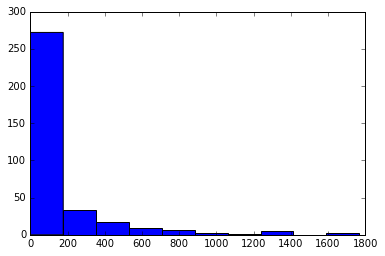

In [97]:
# minutes non passing students
describe_data(non_passing_minutes.values())

Mean: 2.58908045977
Standard deviation: 2.90670969025
Minimum: 0
Maximum: 18


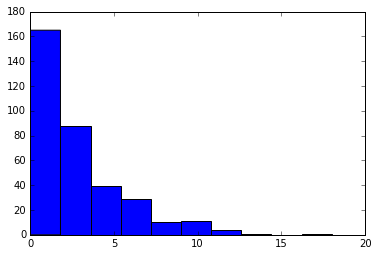

In [100]:
# courses visited non passing students
describe_data(non_passing_courses.values())

Mean: 4.72642967543
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25


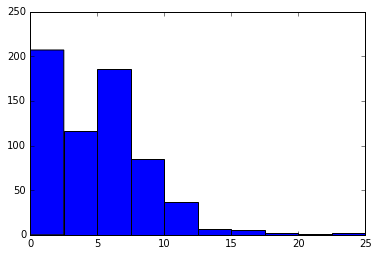

In [101]:
# courses visited passing students
describe_data(passing_courses.values())

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.